### Ejercicio 1

In [ ]:
import graphviz as gv

In [ ]:
def drawDS(ds):
  graph = gv.Digraph("DisjointSet")
  graph.graph_attr['rankdir'] = "BT"
  for e, p in enumerate(ds):
    graph.node(str(e))
    if p >= 0:
      graph.edge(str(e), str(p))
  return graph

In [ ]:
class DisjointSet:
  def __init__(self, elements):
    self.name_to_index = {name: i for i, name in enumerate(elements)}
    self.index_to_name = {i: name for i, name in enumerate(elements)}
    self.parent = list(range(len(elements)))
    self.rank = [0] * len(elements)


  def find(self, element):
    if element not in self.name_to_index:
      return -1

    index = self.name_to_index[element]

    if self.parent[index] == index:
      return index

    self.parent[index] = self.find(self.index_to_name[self.parent[index]])
    return self.parent[index]

  def union(self, element1, element2):
        root1_index = self.find(element1)
        root2_index = self.find(element2)

        if root1_index == -1 or root2_index == -1:
            print(f"Error: Uno o ambos individuos no encontrados ({element1}, {element2})")
            return False

        if root1_index != root2_index:
            if self.rank[root1_index] < self.rank[root2_index]:
                self.parent[root1_index] = root2_index
            elif self.rank[root1_index] > self.rank[root2_index]:
                self.parent[root2_index] = root1_index
            else:
                self.parent[root2_index] = root1_index
                self.rank[root1_index] += 1
            return True

        return False

  def are_friends(self, element1, element2):
        return self.find(element1) == self.find(element2)

  def get_numeric_representation(self):
        numeric_ds = []
        for i in range(len(self.parent)):
            if self.parent[i] == i:
                numeric_ds.append(-1)
            else:
                numeric_ds.append(self.parent[i])
        return numeric_ds

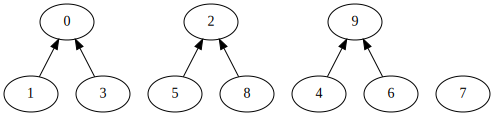

In [ ]:
individuos =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
#.             0.    1.   2.   3.   4.   5.   6.   7.   8.   9
ds = DisjointSet(individuos)

relaciones = [
    ('a', 'b'),
    ('b', 'd'),
    ('c', 'f'),
    ('c', 'i'),
    ('j', 'e'),
    ('g', 'j')
]

for r1, r2 in relaciones:
    ds.union(r1, r2)

drawDS(ds.get_numeric_representation())

In [ ]:
# Chequear amigos de cada uno
print(f"A es amigo de B? {ds.are_friends('a', 'b')}")
print(f"B es amigo de C? {ds.are_friends('b', 'c')}")
print(f"C es amigo de D? {ds.are_friends('c', 'd')}")

### Ejercicio 2

In [ ]:
class DisjointSet:
  def __init__(self, elements):
    self.name_to_index = {name: i for i, name in enumerate(elements)}
    self.index_to_name = {i: name for i, name in enumerate(elements)}
    self.parent = list(range(len(elements)))
    self.rank = [0] * len(elements)


  # 2.1 Compresion de Caminos
  def find(self, element):
    if element not in self.name_to_index:
      return -1

    index = self.name_to_index[element]

    if self.parent[index] == index:
        return index

    self.parent[index] = self.find(self.index_to_name[self.parent[index]])
    return self.parent[index]

  # 2.2 Union por rangos
  def union(self, element1, element2):
        root1_index = self.find(element1)
        root2_index = self.find(element2)

        if root1_index == -1 or root2_index == -1:
            print(f"Error: Uno o ambos individuos no encontrados ({element1}, {element2})")
            return False

        if root1_index != root2_index:
            if self.rank[root1_index] < self.rank[root2_index]:
                self.parent[root1_index] = root2_index
            elif self.rank[root1_index] > self.rank[root2_index]:
                self.parent[root2_index] = root1_index
            else:
                self.parent[root2_index] = root1_index
                self.rank[root1_index] += 1
            return True

        return False

### Ejercicio 3

In [1]:
def find(ds, e):
  return ds[e]


def union(ds, a, b):
  a = find(ds,  a)
  b = find(ds, b)

  if a == b: return
  for e, p in enumerate(ds):
    if p == a:
      ds[e] = b


def detectar_ciclo(num_vertices, aristas):
  ds = list(range(num_vertices))

  for u, v in aristas:
    if not union(ds, u, v):
      return True

  return False


In [2]:
num_vertices = 4
aristas = [
  (0, 1),
  (1, 2),
  (2, 3),
  (3, 0)
]

print(f"Hay ciclo? {detectar_ciclo(num_vertices, aristas)}")

Hay ciclo? True
